<a href="https://colab.research.google.com/github/100477706/Proyecto_Aprendizaje/blob/main/predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

**Grupo de Trabajo**: 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

# **1. CARGA DE DATOS**

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

attrition_availabledata_06.csv.gz  sample_data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("attrition_availabledata_06.csv.gz", compression="gzip", sep=",") #subir el archivo comprimido
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


# **2. EDA**

En este apartado vamos a llevar a cabo Exploratory Data Analysis (EDA), el cual nos va a ayudar a entender el conjunto de datos antes de aplicar cualquier modelo o hipótesis de prueba. El EDA nos va a permitir establecer las tendencias, correlaciones y anomalías que se pueden encontar en los datos. Con este tipo de análisis podemos determinar cuál son los métodos a implementar y cuáles son las features indicadas a utilizar y que den una información relevante al momento de evaluar el modelo a desarrollar.

A continuación mostramos el contenido del archivo para verificar la cantidad de filas y columnas que tenemos, donde adicionalmente queremos verificar el tipo de datos que tenemos en nuestra base de datos. Para ello mostramos la información referente al contenido de la tabla.

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14

A continuación utilizamos la función de descripción del dataset para que por cada una de las features (Columnas), podamos obtener valores estadísticos que nos permiten describir la función sabiendo los valores medios, la desviación y el cómo se distribuye los datos por cada feature. Adicionalmente es útil para el Exploratory Data Analysis (EDA), ya que nos ayuda a comprender las características de los datos antes de implementar el modelo.

In [ ]:
# Información total del dataset
print("\nContenido del Dataset:")
df.describe()


Contenido del Dataset:


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2921.000000,2928.000000,2913.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2926.000000,2940.000000,2940.0,2940.000000,2936.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.311828,12.688095,2.734014,3.156463,2.716878,2.705601,2.766564,36.959864,9.271088,2.909864,...,64855.948980,2.713260,15.256463,8.0,0.803741,11.469005,2.789456,7.042177,2.215986,4.117347
std,1.340066,5.494808,0.714883,0.363355,1.090252,1.098222,0.703519,9.137364,8.113162,1.024888,...,46800.380469,2.493371,3.652041,0.0,0.858827,7.837689,1.279125,6.125843,3.269241,3.563764
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.262869,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29405.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.997414,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49070.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.896439,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,82240.000000,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


A continuación, procedemos con la contabilizacón de la cantidad de variables e instancias distintas que tenemos en el dataset, de tal forma de darnos una idea general de los datos con los que procederemos a trabajar.

In [ ]:
# Cantidad de variables e instancias
print(f"\nEl dataset tiene {df.shape[0]} instancias y {df.shape[1]} variables.")


El dataset tiene 2940 instancias y 31 variables.


Sabiendo los datos que tenemos a disposición, entonces vamos a proceder con identificar las variables que tiene nuestro modelo, clasificándolas como categóricas o numéricas. Este proceso nos va a permitir determinar si es necesaria una estandarización, decidir cuál es el mejor modelo para evaluar los datos que se tienen y corregir las variables numéricas en el caso de tener datos erróneos.

In [ ]:
# Identificar tipos de variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nVariables categóricas: {categorical_vars}")
print(f"\nVariables numéricas: {numerical_vars}")


Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Sabiendo y conociendo bien los diferentes tipos de variables que tenemos presente, ahora procedemos a identificar aquellas variables categóricas que tengan una alta cardinalidad. Es importante recordar que aquellas variables que tienen una alta cardinalidad son aquellas que tienen un gran número de valores únicos y lo cual nos ayuda a conocer si es necesario hacer agrupamientos para evitar que el entrenamiento del modelo se dificulte.

In [ ]:
# Identificar variables categóricas con alta cardinalidad
high_cardinality_vars = [col for col in categorical_vars if df[col].nunique() > 10]
print(f"\nVariables categóricas con alta cardinalidad: {high_cardinality_vars}")


Variables categóricas con alta cardinalidad: []


In [ ]:
# Identificar variables numéricas con alta cardinalidad (muchos valores únicos)
high_cardinality_numerical = [col for col in numerical_vars if df[col].nunique() > df.shape[0] * 0.9]
print(f"\nVariables numéricas con alta cardinalidad: {high_cardinality_numerical}")


Variables numéricas con alta cardinalidad: ['hrs', 'EmployeeID']


Posteriormente para realizar la limpieza de los datos, es necesario detectar aquellos valores que sean nulos, ya que estos pueden gerar inconvenientes al momento de hacer el entrenamiento del modelo. Luego de tener esta información, podemos decidir eliminar, imputar o gestionar dichos datos de tal forma que no generen errores al momento de contruir el modelo. Mediante la siguinte implementación, podemos conocer por cada una de las features, el número de valores nulos existentes.  

In [ ]:
# Valores nulos
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print("\nValores nulos por columna:")
        print(missing)
    else:
        print("\nNo hay valores nulos en el dataset.")
missing_values(df)


Valores nulos por columna:
EnvironmentSatisfaction    19
JobSatisfaction            12
WorkLifeBalance            27
NumCompaniesWorked         14
TotalWorkingYears           4
dtype: int64


Luego, evaluamos si existe alguna columna de las presentes en el dataset proporcionado que tenga la condición de ser constante. Es importante mencionar que una columna constante es aquella que todas sus filas contienen un mismo valor. Por otro lado también tenemos la verificación de la existencia de una columna que contiene un código de verificación que identifica de alguna forma a los empleados de la empresa, siendo este un ID.

La identificación de estos dos tipos de columnas nos va a servir para retirarlas de la muestra con la que se entrenará el modelo, ya que estos dos tipos antes mencinados no genera ningún tipo de valor al modelo que se desea construir.

In [ ]:
# Identificar columnas constantes
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nColumnas constantes: {constant_cols}")

# Identificar columnas de ID
id_cols = [col for col in df.columns if 'id' in col.lower() or df[col].is_unique]
print(f"\nColumnas de ID: {id_cols}")


Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Columnas de ID: ['EmployeeID']


Con este último apartado, pretendemos establecer si el problema al que nos estamos enfretando es de clasificación o de regresión. Con ello buscamos definir correctamente el modelo que queremos implementar y los elementos que se deben considerar para lograrlo, por lo que verificamos si "Attrition" es categórica o numérica. Adicionalmente, verificamos la distribución de la función objetivo de tal forma de verificar si esta se encuentra desbalancaeda o no.

Como se puede verificar a continuación, dado que la variable Attrition es categórica, entonces estamos ante un problema de clasificación, donde se puede verificar que nuestra función objetivo está desbalanceada, ya que tenemos un número muy alto de "No" contra muy pocos "Yes". Esto último nos va a permitir saber si el modelo debe ajustarse o no.


El problema es de clasificación.

Distribución de la variable objetivo:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

La variable objetivo está desbalanceada.


<ipython-input-15-1dd7eb712a7c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='coolwarm')


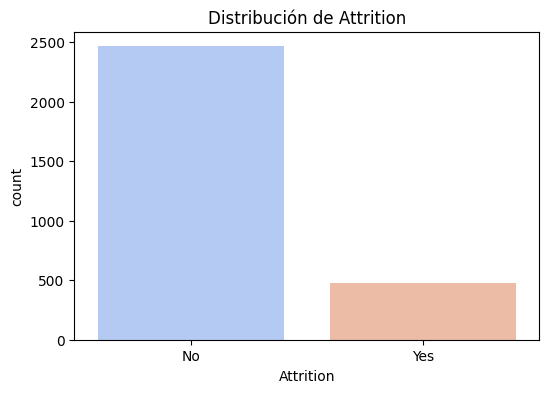

In [ ]:
# Determinar si es un problema de clasificación o regresión
if df['Attrition'].dtype == 'object' or df['Attrition'].nunique() < 10:
    print("\nEl problema es de clasificación.")

    # Evaluar desbalance de clases
    class_counts = df['Attrition'].value_counts(normalize=True)
    print("\nDistribución de la variable objetivo:")
    print(class_counts)
    if class_counts.min() < 0.3:
        print("\nLa variable objetivo está desbalanceada.")
else:
    print("\nEl problema es de regresión.")

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x=df['Attrition'], palette='coolwarm')
plt.title('Distribución de Attrition')
plt.show()


# **3. PROCESO DE EVALUACIÓN**

## **3.1 Estimacion del Rendimiento Futuro**

Para este apartado es necesario considerar el proceso utilizado para la estimación del rendmiento futuro, buscando asegurar que nuestro modelo se evalúe de manera realista en datos que no ha analizado con anterioridad. La idea principal es enterenar al modelo con un conjunto de datos y evaluarlo con otro, ya que si se hiciera con el mismo, puede dar una estimación sesgada del rendimiento real.

Para lograr esto, hacemos una partición entre los elementos del dataset que disponemos, donde dividimos el conjunto de ejemplos se va a dividir en dos conjuntos y cuyos elementos se escogen aleatoriamente del conjunto disponible. Esto nos va a permitir establecer un conjunto de métricras que van a permitir evaluar el problema de forma consecuente y concreta.

La primera de estás métricas se conoce como **balanced accuracy**, la cual utilizaremos ya que conocemos del EDA que las clases se encuentran desbalanceadas. Este procedimiento nos va a permitir que el modelo no prediga que los datos de prueba siempre dan como resultado "NO", sino que le coloque el mismo peso al "SI" como al "NO". Para ello, es necesario tener en consideración la métrica de los datos que indica que los datos han sido correctamente identificados como positivos (TPR) y crrectamente identificados como negativos (TNR).

Esto lo hacemos ya que para obtener la **balanced accuracy** es necesario hacer la media entre la TPR y la TNR (TPR + TPN / 2). La idea de hacer este proceso es que se pueda evaluar el rendimiento del modelo de forma justa en el caso de clases desbalanceadas y que el modelo pueda aprender verdaderamente a distinguir entre ambas clases presentes y no la mayoritaria.

Teniendo en consideración que se debe obtner el TPR y TPN, entonces también será necesario obtener las matrices de confunsión, las cuales nos permiten saber el rendimiento del modelo de clasificación que vamos a aplicar en los siguientes apartados, ya que nos va a dar información acerca del acierto de las predicciones, clasificándolas como falsos postivos, falsos negativos, verdadero negativo o verdadero positivo. Este procedimiento se realiza para entender los errores del modelo y poder calcular el TPR (definido como TPR = TP / TP + FN) y el TNR (definido como TPR = TN / TN + FP), los cuales son necesarios para verificar que el modelo evalue de forma justa.

## **3.2 DIVISION DE DATOS EN TRAIN Y TEST**

La idea principal es establecer un conjunto de datos que serán aquellos con los que entrenaremos el modelo y se realizará con 2/3 de los datos disponibles.